# 1. Importação das Bibliotecas e leitura dos dados

In [ ]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
id_da_planilha = '1q64TPaErzCYgXX6Exp1hopq_L2JnRT3j'
gid = '1469769408'

url = f'https://docs.google.com/spreadsheets/d/{id_da_planilha}/export?format=csv&gid={gid}'

df = pd.read_csv(url)
display(df.tail())

,Idade,Demissão,Viagem de negócios,Diárias recebidas,Departamento,Distância de Casa,Escolaridade,Área de Formação,Número de contratos de trabalho na empresa,ID Funcionário,Nível de Satisfação com o ambiente de trabalho,Gênero,Salário por hora,Nível de envolvimento com o trabalho,Nível hierárquico,Cargo,Satisfação com o trabalho,Estado civil,Renda mensal,Salário Mensal,qtde de empresas que já trabalhou,Maior de idade,Faz hora extra,percentual de aumento de salário,score de performance,Satisfação nas relações Não trabalho,Jornada padrão de trabalho,opção de remaunração variável em ações,Total de anos trabalhados,Qtde de treinamentos realizados no último ano,Equilíbrio vida trabalho,Total de anos trabalhados na empresa,Anos trabalhados na função atual,Anos desde a última promoção,Anos trabalhando com o atual gestor
1465,36,Não,Viaja frequentemente,884,Pesquisa e Desenvolvimento,23,2,Ciências Médicas,1,2061,3,Masculino,41,4,2,Técnico de Laboratório,4,Casado,2571,12290,4,Sim,Não,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,Não,Viaja raramente,613,Pesquisa e Desenvolvimento,6,1,Ciências Médicas,1,2062,4,Masculino,42,2,3,Reprentante de saúde,1,Casado,9991,21457,4,Sim,Não,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,Não,Viaja raramente,155,Pesquisa e Desenvolvimento,4,3,Ciências Humanas,1,2064,2,Masculino,87,4,2,Diretor de manufatura,2,Casado,6142,5174,1,Sim,Sim,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,Não,Viaja frequentemente,1023,Vendas,2,3,Ciências Médicas,1,2065,4,Masculino,63,2,2,Executivo de vendas,2,Casado,5390,13243,2,Sim,Não,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,Não,Viaja raramente,628,Pesquisa e Desenvolvimento,8,3,Ciências Médicas,1,2068,2,Masculino,82,4,2,Técnico de Laboratório,3,Casado,4404,10228,2,Sim,Não,12,3,1,80,0,6,3,4,4,3,1,2


In [ ]:
df.shape

(1470, 35)

In [ ]:
num_cols = len(df.select_dtypes(include='number').columns)

cat_cols = len(df.select_dtypes(include='object').columns)

print(f"Colunas Numéricas: {num_cols}")
print(f"Colunas Categóricas: {cat_cols}")

Colunas Numéricas: 26
Colunas Categóricas: 9


In [ ]:
demissao_counts = df['Demissão'].value_counts()

display(demissao_counts)

,count
Demissão,
Não,1233
Sim,237


# 2. Tratamento das colunas

In [ ]:
df.columns

Index(['Idade', 'Demissão', 'Viagem de negócios', 'Diárias recebidas',
       'Departamento', 'Distância de Casa', 'Escolaridade', 'Área de Formação',
       'Número de contratos de trabalho na empresa', 'ID Funcionário',
       'Nível de Satisfação com o ambiente de trabalho', 'Gênero',
       'Salário por hora', 'Nível de envolvimento com o trabalho',
       'Nível hierárquico', 'Cargo', 'Satisfação com o trabalho',
       'Estado civil', 'Renda mensal', 'Salário Mensal',
       'qtde de empresas que já trabalhou', 'Maior de idade', 'Faz hora extra',
       'percentual de aumento de salário', 'score de performance',
       'Satisfação nas relações Não trabalho', 'Jornada padrão de trabalho',
       'opção de remaunração variável em ações', 'Total de anos trabalhados',
       'Qtde de treinamentos realizados no último ano',
       'Equilíbrio vida trabalho', 'Total de anos trabalhados na empresa',
       'Anos trabalhados na função atual', 'Anos desde a última promoção',
       'Anos 

In [ ]:
df = df.rename(columns={
    'Diárias recebidas': 'Diarias Recebidas',
    'Área de Formação': 'Area de Formacao',
    'Número de contratos de trabalho na empresa': 'Numero de Contratos de Trabalho na Empresa',
    'ID Funcionário': 'ID Funcionario',
    'Nível de Satisfação com o ambiente de trabalho': 'Nivel de Satisfacao com o Ambiente de Trabalho',
    'Salário por hora': 'Salario por Hora',
    'Nível de envolvimento com o trabalho': 'Nivel de Envolvimento com o Trabalho',
    'Nível hierárquico': 'Nivel Hierarquico',
    'Estado civil': 'Estado Civil',
    'Renda mensal': 'Renda Mensal',
    'Salário Mensal': 'Salario Mensal',
    'qtde de empresas que já trabalhou': 'Quantidade de Empresas que Ja Trabalhou',
    'Maior de idade': 'Maior de Idade',
    'Faz hora extra': 'Faz Hora Extra',
    'percentual de aumento de salário': 'Percentual de Aumento de Salario',
    'score de performance': 'Score de Performance',
    'Satisfação nas relações Não trabalho': 'Satisfacao nas Relacoes Nao Trabalho',
    'Jornada padrão de trabalho': 'Jornada Padrao de Trabalho',
    'opção de remaunração variável em ações': 'Opcao de Remuneracao Variavel em Acoes',
    'Total de anos trabalhados': 'Total de Anos Trabalhados',
    'Qtde de treinamentos realizados no último ano': 'Quantidade de Treinamentos Realizados no Ultimo Ano',
    'Equilíbrio vida trabalho': 'Equilibrio Vida Trabalho',
    'Total de anos trabalhados na empresa': 'Total de Anos Trabalhados na Empresa',
    'Anos trabalhados na função atual': 'Anos Trabalhados na Funcao Atual',
    'Anos desde a última promoção': 'Anos Desde a Ultima Promocao',
    'Anos trabalhando com o atual gestor': 'Anos Trabalhando com o Atual Gestor'
})

print(df.columns)

Index(['Idade', 'Demissão', 'Viagem de negócios', 'Diarias Recebidas',
       'Departamento', 'Distância de Casa', 'Escolaridade', 'Area de Formacao',
       'Numero de Contratos de Trabalho na Empresa', 'ID Funcionario',
       'Nivel de Satisfacao com o Ambiente de Trabalho', 'Gênero',
       'Salario por Hora', 'Nivel de Envolvimento com o Trabalho',
       'Nivel Hierarquico', 'Cargo', 'Satisfação com o trabalho',
       'Estado Civil', 'Renda Mensal', 'Salario Mensal',
       'Quantidade de Empresas que Ja Trabalhou', 'Maior de Idade',
       'Faz Hora Extra', 'Percentual de Aumento de Salario',
       'Score de Performance', 'Satisfacao nas Relacoes Nao Trabalho',
       'Jornada Padrao de Trabalho', 'Opcao de Remuneracao Variavel em Acoes',
       'Total de Anos Trabalhados',
       'Quantidade de Treinamentos Realizados no Ultimo Ano',
       'Equilibrio Vida Trabalho', 'Total de Anos Trabalhados na Empresa',
       'Anos Trabalhados na Funcao Atual', 'Anos Desde a Ultima Promo

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Idade                                                1470 non-null   int64 
 1   Demissão                                             1470 non-null   object
 2   Viagem de negócios                                   1470 non-null   object
 3   Diarias Recebidas                                    1470 non-null   int64 
 4   Departamento                                         1470 non-null   object
 5   Distância de Casa                                    1470 non-null   int64 
 6   Escolaridade                                         1470 non-null   int64 
 7   Area de Formacao                                     1470 non-null   object
 8   Numero de Contratos de Trabalho na Empresa           1470 non-null   int64 
 9

In [ ]:
df = df.drop(columns=['ID Funcionario', 'Maior de Idade', 'Jornada Padrao de Trabalho', 'Numero de Contratos de Trabalho na Empresa'])

print(df.columns)

Index(['Idade', 'Demissão', 'Viagem de negócios', 'Diarias Recebidas',
       'Departamento', 'Distância de Casa', 'Escolaridade', 'Area de Formacao',
       'Nivel de Satisfacao com o Ambiente de Trabalho', 'Gênero',
       'Salario por Hora', 'Nivel de Envolvimento com o Trabalho',
       'Nivel Hierarquico', 'Cargo', 'Satisfação com o trabalho',
       'Estado Civil', 'Renda Mensal', 'Salario Mensal',
       'Quantidade de Empresas que Ja Trabalhou', 'Faz Hora Extra',
       'Percentual de Aumento de Salario', 'Score de Performance',
       'Satisfacao nas Relacoes Nao Trabalho',
       'Opcao de Remuneracao Variavel em Acoes', 'Total de Anos Trabalhados',
       'Quantidade de Treinamentos Realizados no Ultimo Ano',
       'Equilibrio Vida Trabalho', 'Total de Anos Trabalhados na Empresa',
       'Anos Trabalhados na Funcao Atual', 'Anos Desde a Ultima Promocao',
       'Anos Trabalhando com o Atual Gestor'],
      dtype='object')


In [ ]:
df['Departamento'] = df['Departamento'].replace("Recursos HumaNãos", "Recursos Humanos")

df['Departamento'].unique()

array(['Vendas', 'Pesquisa e Desenvolvimento', 'Recursos Humanos'],
      dtype=object)

In [ ]:
correcoes = {
    'EnsiNão técnico': 'Ensino Técnico',
    'Recursos HumaNãos': 'Recursos Humanos'
}

df['Area de Formacao'] = df['Area de Formacao'].replace(correcoes)

df['Area de Formacao'].unique()

array(['Ciências Humanas', 'Outras', 'Ciências Médicas', 'Marketing',
       'Ensino Técnico', 'Recursos Humanos'], dtype=object)

In [ ]:
correcoes_cargos = {
    'Recursos HumaNãos': 'Recursos Humanos',
    'Reprentante de saúde': 'Representante de Saúde',
    'Representante de vendas': 'Representante de Vendas',
    'Técnico de Laboratório': 'Tecnico de Laboratorio'
}

df['Cargo'] = df['Cargo'].replace(correcoes_cargos)

print(df['Cargo'].unique())

['Executivo de vendas' 'Pesquisador cientista' 'Tecnico de Laboratorio'
 'Diretor de manufatura' 'Representante de Saúde' 'Gerente'
 'Representante de Vendas' 'Diretor de pesquisa' 'Recursos Humanos']


# Estatísticas descritivas das colunas quantitativas

In [ ]:
descricao_por_demissao = df.groupby('Demissão').describe().T
descricao_por_demissao

Demissão                                                           Não  \
Idade                                              count   1233.000000   
                                                   mean      37.561233   
                                                   std        8.888360   
                                                   min       18.000000   
                                                   25%       31.000000   
                                                   50%       36.000000   
                                                   75%       43.000000   
                                                   max       60.000000   
Diarias Recebidas                                  count   1233.000000   
                                                   mean     812.504461   
                                                   std      403.208379   
                                                   min      102.000000   
                                                   25%      477.000000   
                                                   50%      817.000000   
                                                   75%     1176.000000   
                                                   max     1499.000000   
Distância de Casa                                  count   1233.000000   
                                                   mean       8.915653   
                                                   std        8.012633   
                                                   min        1.000000   
                                                   25%        2.000000   
                                                   50%        7.000000   
                                                   75%       13.000000   
                                                   max       29.000000   
Escolaridade                                       count   1233.000000   
                                                   mean       2.927007   
                                                   std        1.027002   
                                                   min        1.000000   
                                                   25%        2.000000   
                                                   50%        3.000000   
                                                   75%        4.000000   
                                                   max        5.000000   
Nivel de Satisfacao com o Ambiente de Trabalho     count   1233.000000   
                                                   mean       2.771290   
                                                   std        1.071132   
                                                   min        1.000000   
                                                   25%        2.000000   
                                                   50%        3.000000   
                                                   75%        4.000000   
                                                   max        4.000000   
Salario por Hora                                   count   1233.000000   
                                                   mean      65.952149   
                                                   std       20.380754   
                                                   min       30.000000   
                                                   25%       48.000000   
                                                   50%       66.000000   
                                                   75%       83.000000   
                                                   max      100.000000   
Nivel de Envolvimento com o Trabalho               count   1233.000000   
                                                   mean       2.770479   
                                                   std        0.692050   
                                                   min        1.000000   
                                                   25%        2.000000   
    

In [ ]:
descricao_por_demissao_e_idade = df.groupby('Demissão')['Idade'].describe()
descricao_por_demissao_e_idade

,count,mean,std,min,25%,50%,75%,max
Demissão,,,,,,,,
Não,1233.0,37.561233,8.88836,18.0,31.0,36.0,43.0,60.0
Sim,237.0,33.607595,9.68935,18.0,28.0,32.0,39.0,58.0


In [ ]:
descricao_por_demissao_e_idade = df.groupby('Demissão')['Distância de Casa'].describe()
descricao_por_demissao_e_idade

,count,mean,std,min,25%,50%,75%,max
Demissão,,,,,,,,
Não,1233.0,8.915653,8.012633,1.0,2.0,7.0,13.0,29.0
Sim,237.0,10.632911,8.452525,1.0,3.0,9.0,17.0,29.0


In [ ]:
descricao_por_demissao_e_idade = df.groupby('Demissão')['Salario por Hora'].describe()
descricao_por_demissao_e_idade

,count,mean,std,min,25%,50%,75%,max
Demissão,,,,,,,,
Não,1233.0,65.952149,20.380754,30.0,48.0,66.0,83.0,100.0
Sim,237.0,65.755274,20.152786,31.0,50.0,66.0,84.0,100.0


In [ ]:
descricao_por_demissao_e_idade = df.groupby('Demissão')['Nivel Hierarquico'].describe()
descricao_por_demissao_e_idade

,count,mean,std,min,25%,50%,75%,max
Demissão,,,,,,,,
Não,1233.0,2.145985,1.117933,1.0,1.0,2.0,3.0,5.0
Sim,237.0,1.637131,0.940594,1.0,1.0,1.0,2.0,5.0


In [ ]:
descricao_por_demissao_e_idade = df.groupby('Demissão')['Renda Mensal'].describe()
descricao_por_demissao_e_idade

,count,mean,std,min,25%,50%,75%,max
Demissão,,,,,,,,
Não,1233.0,6832.739659,4818.208001,1051.0,3211.0,5204.0,8834.0,19999.0
Sim,237.0,4787.092827,3640.210367,1009.0,2373.0,3202.0,5916.0,19859.0


In [ ]:
descricao_por_demissao_e_idade = df.groupby('Demissão')['Total de Anos Trabalhados'].describe()
descricao_por_demissao_e_idade

,count,mean,std,min,25%,50%,75%,max
Demissão,,,,,,,,
Não,1233.0,11.862936,7.760719,0.0,6.0,10.0,16.0,38.0
Sim,237.0,8.244726,7.169204,0.0,3.0,7.0,10.0,40.0


# Tabela de frequência das colunas qualitativas

In [ ]:
colunas_qualitativas = df.select_dtypes(include=['object']).columns
print("Colunas qualitativas:", colunas_qualitativas)

Colunas qualitativas: Index(['Demissão', 'Viagem de negócios', 'Departamento', 'Area de Formacao',
       'Gênero', 'Cargo', 'Estado Civil', 'Faz Hora Extra'],
      dtype='object')


### Função da tabela

In [ ]:
def criar_tabela_cruzada_demissao_por_variavel(df, coluna):

    crosstab = pd.crosstab(df[coluna], df['Demissão'])

    crosstab['Razao Sim/Não'] = crosstab.apply(
        lambda row: row['Sim'] / row['Não'] if row['Não'] != 0 else None, axis=1
    )

    return crosstab

### Função do gráfico

In [ ]:
def plotar_grafico_razao_sim_nao(df, coluna):

    crosstab = criar_tabela_cruzada_demissao_por_variavel(df, coluna)


    if crosstab is not None and 'Razao Sim/Não' in crosstab.columns:
        crosstab = crosstab.sort_values(by='Razao Sim/Não', ascending=False)
        max_index = crosstab['Razao Sim/Não'].idxmax()
        colors = ['orange' if idx == max_index else 'skyblue' for idx in crosstab.index]

        plt.figure(figsize=(6, 3))
        plt.bar(crosstab.index, crosstab['Razao Sim/Não'], color=colors)
        plt.xlabel(coluna)
        plt.ylabel('Razão Sim/Não')
        plt.title(f'Proporção de Demissão (Sim/Não) por {coluna}')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Não foi possível criar o gráfico para a coluna '{coluna}'.")

#### Viagem a Negócios

In [ ]:
crosstab_viagem = criar_tabela_cruzada_demissao_por_variavel(df, 'Viagem de negócios')
crosstab_viagem

crosstab_viagem.to_excel('/content/viagem.xlsx')

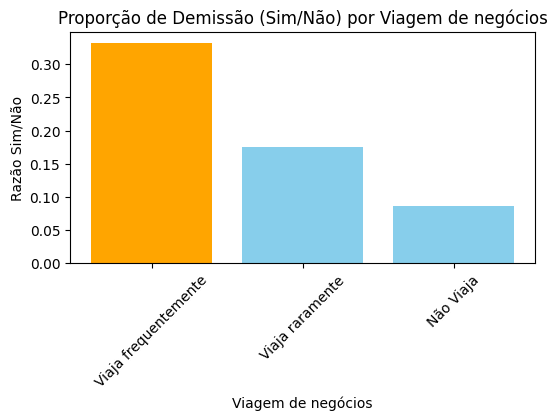

In [ ]:
plotar_grafico_razao_sim_nao(df, 'Viagem de negócios')

#### Departamento

In [ ]:
crosstab_departamento = criar_tabela_cruzada_demissao_por_variavel(df, 'Departamento')
crosstab_departamento

Demissão,Não,Sim,Razao Sim/Não
Departamento,,,
Pesquisa e Desenvolvimento,828,133,0.160628
Recursos Humanos,51,12,0.235294
Vendas,354,92,0.259887


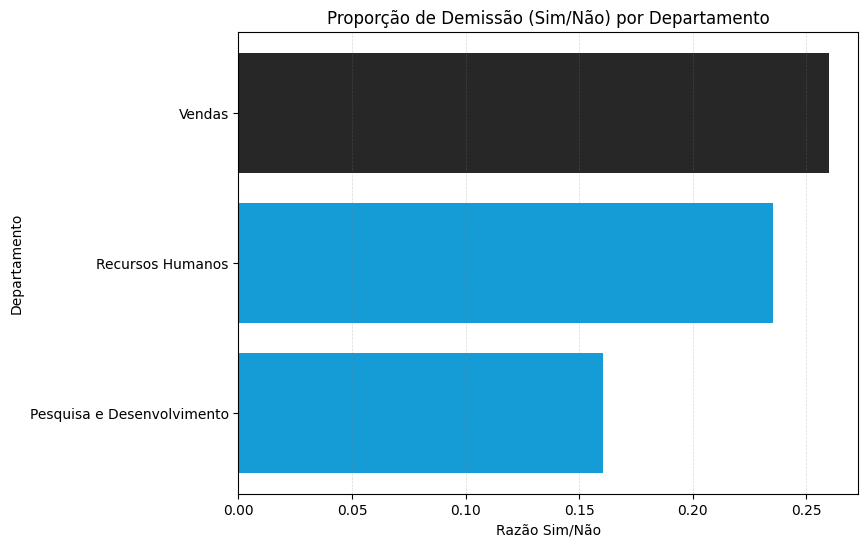

In [ ]:
import matplotlib.pyplot as plt

crosstab_departamento = criar_tabela_cruzada_demissao_por_variavel(df, 'Departamento')

crosstab_departamento = crosstab_departamento.sort_values(by='Razao Sim/Não', ascending=False)

max_index = crosstab_departamento['Razao Sim/Não'].idxmax()

colors = ['#272727' if idx == max_index else '#159CD7' for idx in crosstab_departamento.index]

plt.figure(figsize=(8, 6))
plt.barh(crosstab_departamento.index, crosstab_departamento['Razao Sim/Não'], color=colors)
plt.ylabel('Departamento')
plt.xlabel('Razão Sim/Não')
plt.title('Proporção de Demissão (Sim/Não) por Departamento')
plt.gca().invert_yaxis()
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3, axis='x')
plt.show()

#### Area de Formação

In [ ]:
crosstab_area_de_formacao = criar_tabela_cruzada_demissao_por_variavel(df, 'Area de Formacao')
crosstab_area_de_formacao

Demissão,Não,Sim,Razao Sim/Não
Area de Formacao,,,
Ciências Humanas,517,89,0.172147
Ciências Médicas,401,63,0.157107
Ensino Técnico,100,32,0.320000
Marketing,124,35,0.282258
Outras,71,11,0.154930
Recursos Humanos,20,7,0.350000


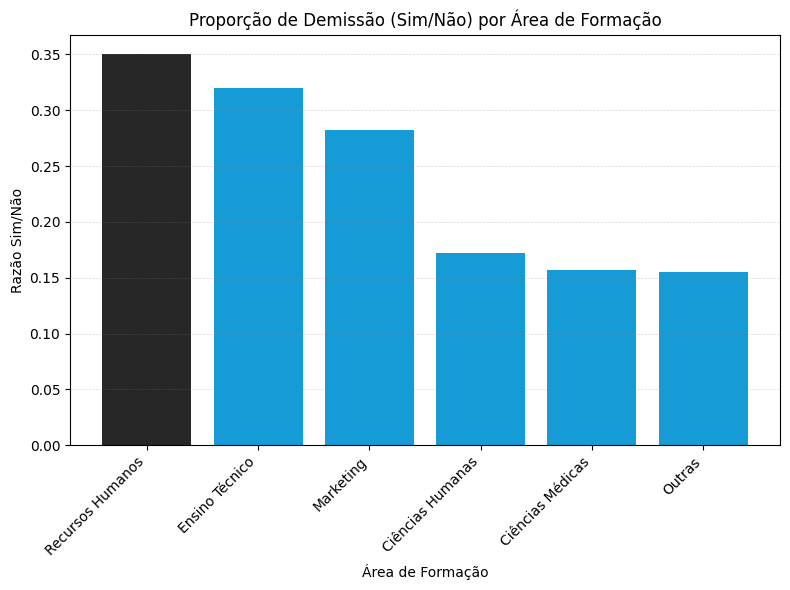

In [ ]:
crosstab_area_de_formacao = criar_tabela_cruzada_demissao_por_variavel(df, 'Area de Formacao')

crosstab_area_de_formacao.to_excel('/content/area_de_formacao.xlsx')

crosstab_area_de_formacao = crosstab_area_de_formacao.sort_values(by='Razao Sim/Não', ascending=False)

max_index = crosstab_area_de_formacao['Razao Sim/Não'].idxmax()

colors = ['#272727' if idx == max_index else '#159CD7' for idx in crosstab_area_de_formacao.index]

plt.figure(figsize=(8, 6))
plt.bar(crosstab_area_de_formacao.index, crosstab_area_de_formacao['Razao Sim/Não'], color=colors)
plt.xlabel('Área de Formação')
plt.ylabel('Razão Sim/Não')
plt.title('Proporção de Demissão (Sim/Não) por Área de Formação')
plt.xticks(rotation=45, ha='right')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

#### Cargo

In [ ]:
crosstab_genero = criar_tabela_cruzada_demissao_por_variavel(df, 'Cargo')
crosstab_genero

Demissão,Não,Sim,Razao Sim/Não
Cargo,,,
Diretor de manufatura,135,10,0.074074
Diretor de pesquisa,78,2,0.025641
Executivo de vendas,269,57,0.211896
Gerente,97,5,0.051546
Pesquisador cientista,245,47,0.191837
Recursos Humanos,40,12,0.300000
Representante de Saúde,122,9,0.073770
Representante de Vendas,50,33,0.660000
Tecnico de Laboratorio,197,62,0.314721


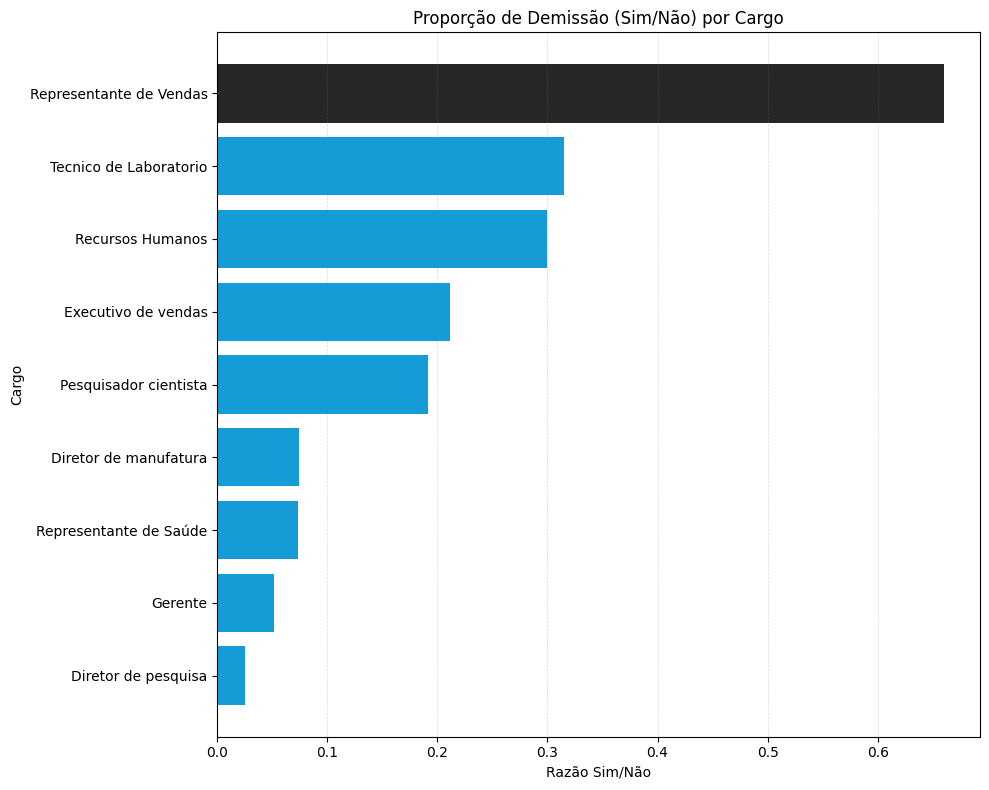

In [ ]:
crosstab_genero = criar_tabela_cruzada_demissao_por_variavel(df, 'Cargo')

crosstab_genero = crosstab_genero.sort_values(by='Razao Sim/Não', ascending=False)

max_index = crosstab_genero['Razao Sim/Não'].idxmax()

colors = ['#272727' if idx == max_index else '#159CD7' for idx in crosstab_genero.index]

plt.figure(figsize=(10, 8))
plt.barh(crosstab_genero.index, crosstab_genero['Razao Sim/Não'], color=colors)
plt.ylabel('Cargo')
plt.xlabel('Razão Sim/Não')
plt.title('Proporção de Demissão (Sim/Não) por Cargo')
plt.gca().invert_yaxis()
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

#### Estado Civil

In [ ]:
crosstab_estado_civil = criar_tabela_cruzada_demissao_por_variavel(df, 'Estado Civil')
crosstab_estado_civil

Demissão,Não,Sim,Razao Sim/Não
Estado Civil,,,
Casado,589,84,0.142615
Divorciado,294,33,0.112245
Solteiro,350,120,0.342857


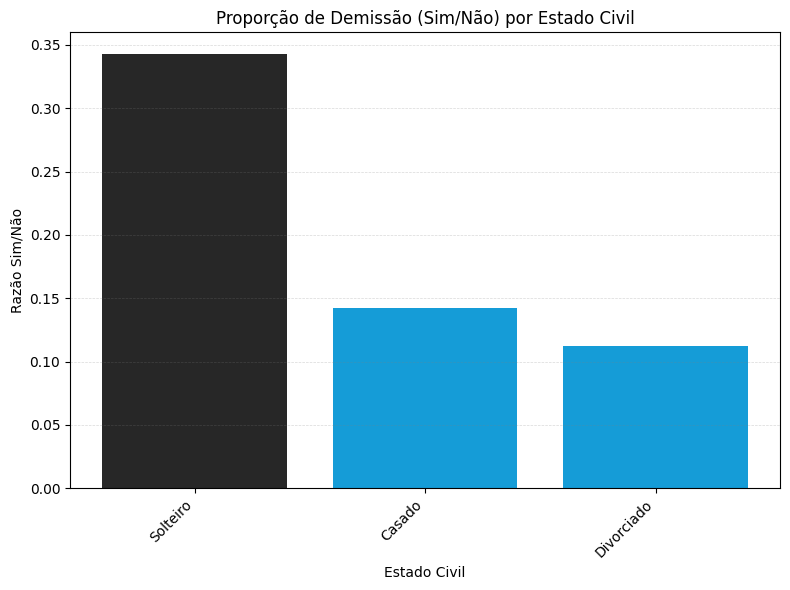

In [ ]:
# Cria a tabela cruzada para a coluna "Estado Civil"
crosstab_estado_civil = criar_tabela_cruzada_demissao_por_variavel(df, 'Estado Civil')

# Ordena a tabela em ordem decrescente com base na Razão Sim/Não
crosstab_estado_civil = crosstab_estado_civil.sort_values(by='Razao Sim/Não', ascending=False)

# Identifica o índice do maior valor
max_index = crosstab_estado_civil['Razao Sim/Não'].idxmax()

# Define as cores: preto para o maior valor e azul para os demais
colors = ['#272727' if idx == max_index else '#159CD7' for idx in crosstab_estado_civil.index]

# Cria o gráfico de barras vertical
plt.figure(figsize=(8, 6))
plt.bar(crosstab_estado_civil.index, crosstab_estado_civil['Razao Sim/Não'], color=colors)
plt.xlabel('Estado Civil')
plt.ylabel('Razão Sim/Não')
plt.title('Proporção de Demissão (Sim/Não) por Estado Civil')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3, axis='y')  # Adiciona linhas de grade no eixo y
plt.tight_layout()  # Ajusta o layout para evitar corte dos rótulos
plt.show()


In [ ]:
crosstab_estado_civil = criar_tabela_cruzada_demissao_por_variavel(df, 'Faz Hora Extra')
crosstab_estado_civil

Demissão,Não,Sim,Razao Sim/Não
Faz Hora Extra,,,
Não,944,110,0.116525
Sim,289,127,0.439446


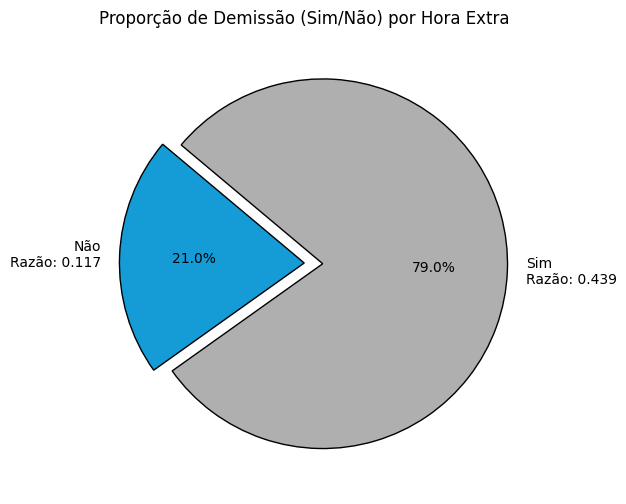

In [ ]:
crosstab_hora_extra = criar_tabela_cruzada_demissao_por_variavel(df, 'Faz Hora Extra')

labels = crosstab_hora_extra.index.tolist()
sizes = crosstab_hora_extra['Razao Sim/Não'].tolist()
max_index = sizes.index(max(sizes))

colors = ['#AFAFAF' if i == max_index else '#159CD7' for i in range(len(labels))]
explode = [0.1 if i == max_index else 0 for i in range(len(labels))]

plt.figure(figsize=(8, 6))
plt.pie(
    sizes,
    labels=[f"{label}\nRazão: {ratio:.3f}" for label, ratio in zip(labels, sizes)],
    autopct='%1.1f%%',  # Exibe porcentagem
    startangle=140,      # Define o ângulo inicial
    colors=colors,       # Aplica a paleta de cores
    explode=explode,     # Explode o maior valor para destaque
    wedgeprops={'edgecolor': 'black'}  # Adiciona borda preta para melhor contraste
)

plt.title('Proporção de Demissão (Sim/Não) por Hora Extra')
plt.show()

## 4. Selecionar Colunas Quantitativas

In [ ]:
if 'Demissao_Numerica' not in df.columns:
    df['Demissao_Numerica'] = df['Demissão'].apply(lambda x: 1 if x == 'Sim' else 0)

X = df.select_dtypes(include=['number']).drop(columns=['Demissao_Numerica'])
y = df['Demissao_Numerica']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report
y_pred = modelo.predict(X_test)
print("Acurácia do modelo:", accuracy_score(y_test, y_pred))
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred))

importancia_variaveis = pd.Series(modelo.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nImportância das variáveis:\n", importancia_variaveis)

Acurácia do modelo: 0.8526077097505669

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       380
           1       0.33      0.07      0.11        61

    accuracy                           0.85       441
   macro avg       0.60      0.52      0.51       441
weighted avg       0.79      0.85      0.81       441


Importância das variáveis:
 Renda Mensal                                           0.095646
Idade                                                  0.080296
Diarias Recebidas                                      0.071555
Salario Mensal                                         0.064118
Salario por Hora                                       0.061736
Total de Anos Trabalhados                              0.061000
Total de Anos Trabalhados na Empresa                   0.052417
Distância de Casa                                      0.048562
Quantidade de Empresas que Ja Trabalhou                0.047092

### Histogramas

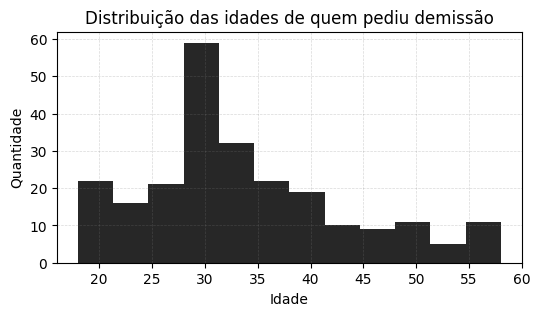

In [ ]:
plt.figure(figsize=(6, 3))
df[df['Demissão'] == 'Sim']['Idade'].hist(bins=12, color='#272727')
plt.title('Distribuição das idades de quem pediu demissão')
plt.xlabel('Idade')
plt.ylabel('Quantidade')

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.show()

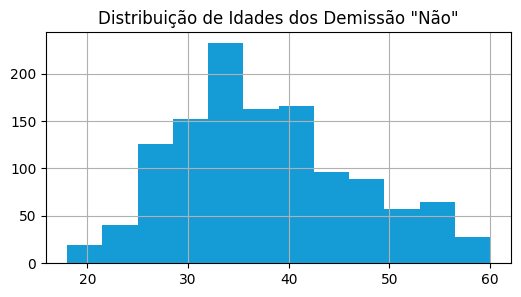

In [ ]:
plt.figure(figsize=(6, 3))
df[df['Demissão'] == 'Não']['Idade'].hist(bins=12, color='#159CD7')
plt.title('Distribuição de Idades dos Demissão "Não"')
plt.show()

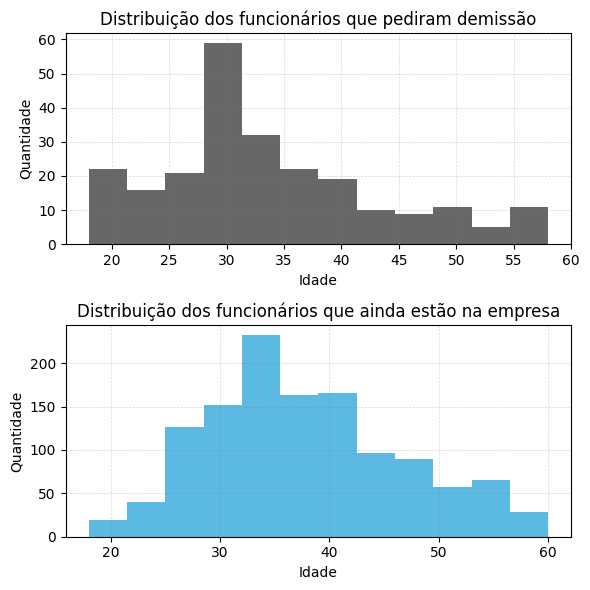

In [ ]:
plt.figure(figsize=(6, 6))

plt.subplot(2, 1, 1)
df[df['Demissão'] == 'Sim']['Idade'].hist(bins=12, color='#272727', alpha=0.7)
plt.title('Distribuição dos funcionários que pediram demissão')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.subplot(2, 1, 2)
df[df['Demissão'] == 'Não']['Idade'].hist(bins=12, color='#159CD7', alpha=0.7)
plt.title('Distribuição dos funcionários que ainda estão na empresa')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

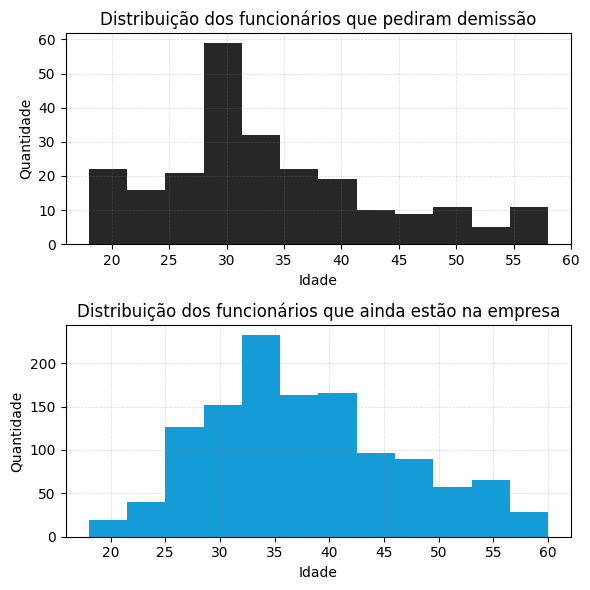

In [ ]:
plt.figure(figsize=(6, 6))

xticks = range(20, 61, 5)  # Exemplo: faixa de idades de 20 a 60, com intervalos de 5 em 5 anos

# Subplot 1: Distribuição de quem pediu demissão
plt.subplot(2, 1, 1)
df[df['Demissão'] == 'Sim']['Idade'].hist(bins=12, color='#272727')
plt.title('Distribuição dos funcionários que pediram demissão')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
plt.xticks(xticks)

# Subplot 2: Distribuição de quem não pediu demissão
plt.subplot(2, 1, 2)
df[df['Demissão'] == 'Não']['Idade'].hist(bins=12, color='#159CD7')
plt.title('Distribuição dos funcionários que ainda estão na empresa')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
plt.xticks(xticks)

plt.tight_layout()
plt.show()


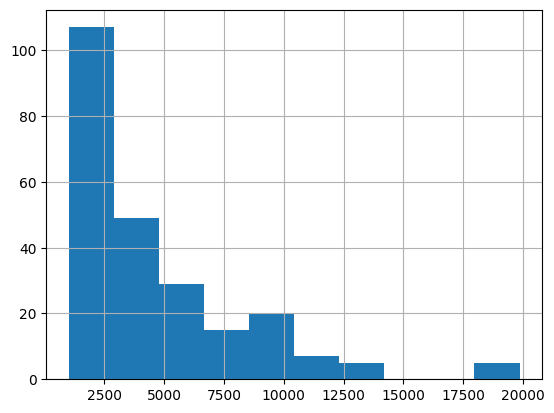

In [ ]:
df[df['Demissão'] == 'Sim']['Renda Mensal'].hist()
plt.show()

In [ ]:
df['Renda Mensal'].max()

19999

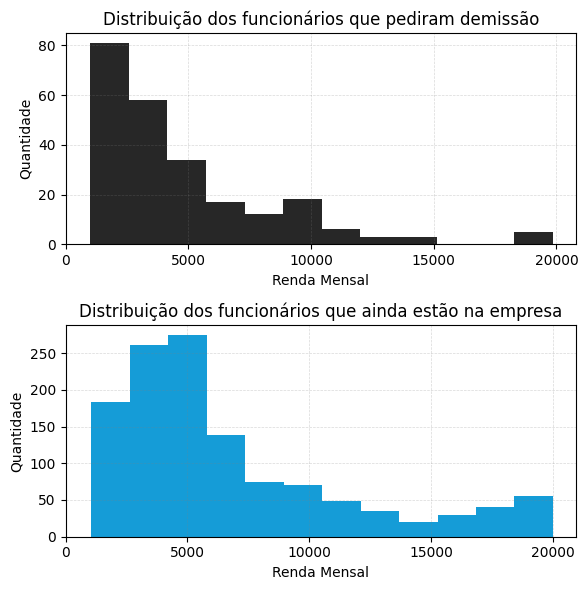

In [ ]:
plt.figure(figsize=(6, 6))

xticks = range(0, 21001, 5000)

plt.subplot(2, 1, 1)
df[df['Demissão'] == 'Sim']['Renda Mensal'].hist(bins=12, color='#272727')
plt.title('Distribuição dos funcionários que pediram demissão')
plt.xlabel('Renda Mensal')
plt.ylabel('Quantidade')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
plt.xticks(xticks)

plt.subplot(2, 1, 2)
df[df['Demissão'] == 'Não']['Renda Mensal'].hist(bins=12, color='#159CD7')
plt.title('Distribuição dos funcionários que ainda estão na empresa')
plt.xlabel('Renda Mensal')
plt.ylabel('Quantidade')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
plt.xticks(xticks)

plt.tight_layout()
plt.show()

In [ ]:
df['Total de Anos Trabalhados'].min()

0

In [ ]:
df['Total de Anos Trabalhados'].max()

40

In [ ]:
df['Anos Trabalhando com o Atual Gestor'].min()

0

In [ ]:
df['Anos Trabalhando com o Atual Gestor'].max()

17

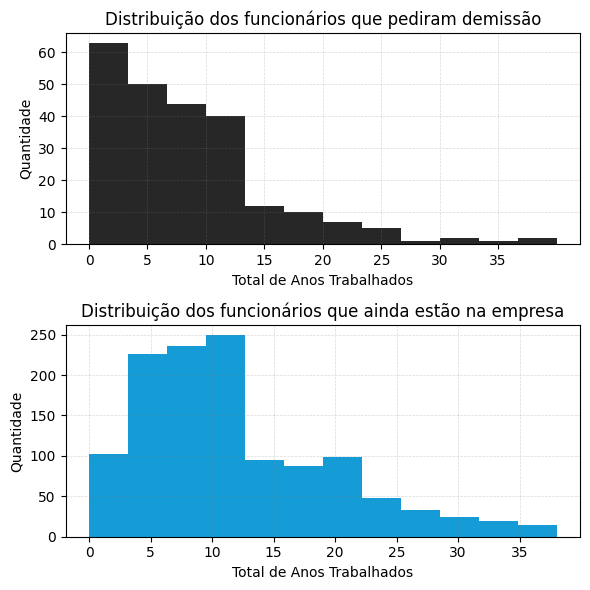

In [ ]:
plt.figure(figsize=(6, 6))

xticks = range(0, 40, 5)

plt.subplot(2, 1, 1)
df[df['Demissão'] == 'Sim']['Total de Anos Trabalhados'].hist(bins=12, color='#272727')
plt.title('Distribuição dos funcionários que pediram demissão')
plt.xlabel('Total de Anos Trabalhados')
plt.ylabel('Quantidade')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
plt.xticks(xticks)

plt.subplot(2, 1, 2)
df[df['Demissão'] == 'Não']['Total de Anos Trabalhados'].hist(bins=12, color='#159CD7')
plt.title('Distribuição dos funcionários que ainda estão na empresa')
plt.xlabel('Total de Anos Trabalhados')
plt.ylabel('Quantidade')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
plt.xticks(xticks)

plt.tight_layout()
plt.show()

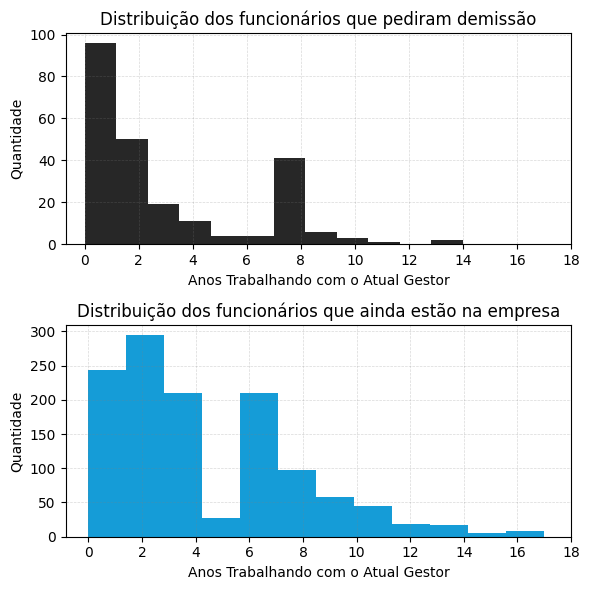

In [ ]:
plt.figure(figsize=(6, 6))

xticks = range(0, 19, 2)

plt.subplot(2, 1, 1)
df[df['Demissão'] == 'Sim']['Anos Trabalhando com o Atual Gestor'].hist(bins=12, color='#272727')
plt.title('Distribuição dos funcionários que pediram demissão')
plt.xlabel('Anos Trabalhando com o Atual Gestor')
plt.ylabel('Quantidade')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
plt.xticks(xticks)

plt.subplot(2, 1, 2)
df[df['Demissão'] == 'Não']['Anos Trabalhando com o Atual Gestor'].hist(bins=12, color='#159CD7')
plt.title('Distribuição dos funcionários que ainda estão na empresa')
plt.xlabel('Anos Trabalhando com o Atual Gestor')
plt.ylabel('Quantidade')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
plt.xticks(xticks)

plt.tight_layout()
plt.show()

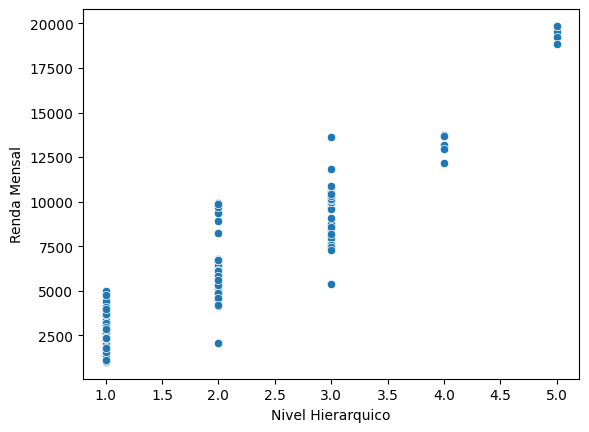

In [ ]:
sns.scatterplot(data=df[df['Demissão'] == 'Sim'], x='Nivel Hierarquico', y='Renda Mensal')
plt.show()

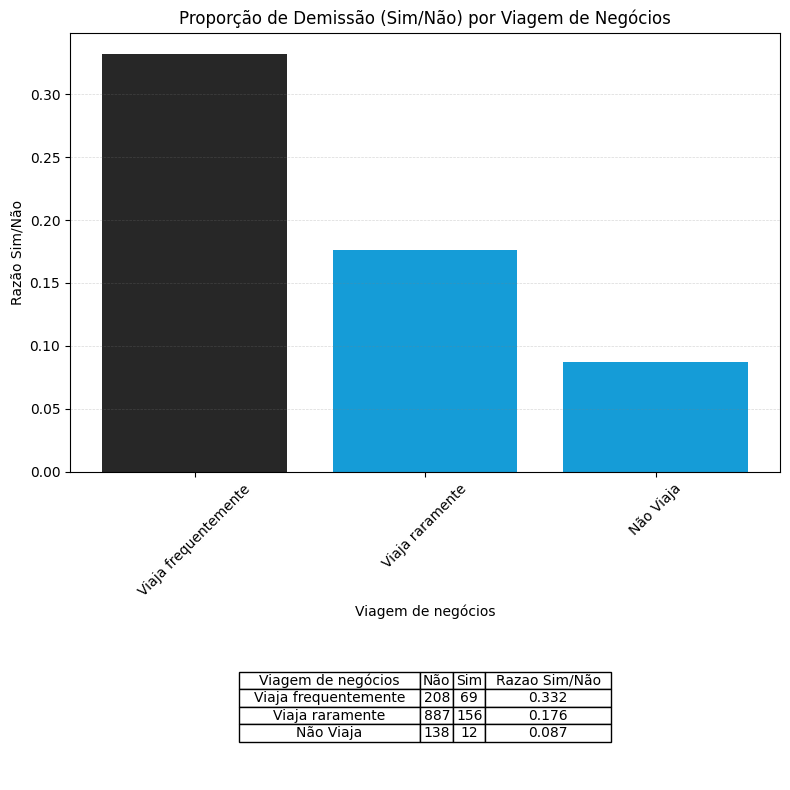

In [ ]:
data = {
    'Viagem de negócios': ['Não Viaja', 'Viaja frequentemente', 'Viaja raramente'],
    'Não': [138, 208, 887],
    'Sim': [12, 69, 156],
    'Razao Sim/Não': [0.087, 0.332, 0.176]
}
crosstab = pd.DataFrame(data).set_index('Viagem de negócios')

crosstab = crosstab.sort_values(by='Razao Sim/Não', ascending=False)

max_index = crosstab['Razao Sim/Não'].idxmax()

colors = ['#272727' if idx == max_index else '#159CD7' for idx in crosstab.index]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios': [3, 1]})

ax1.bar(crosstab.index, crosstab['Razao Sim/Não'], color=colors)
ax1.set_xlabel('Viagem de negócios')
ax1.set_ylabel('Razão Sim/Não')
ax1.set_title('Proporção de Demissão (Sim/Não) por Viagem de Negócios')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3, axis='y')

ax2.axis('off')
table = ax2.table(cellText=crosstab.reset_index().values,
                  colLabels=crosstab.reset_index().columns,
                  cellLoc='center',
                  loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(crosstab.columns) + 1)))

plt.tight_layout()
plt.show()

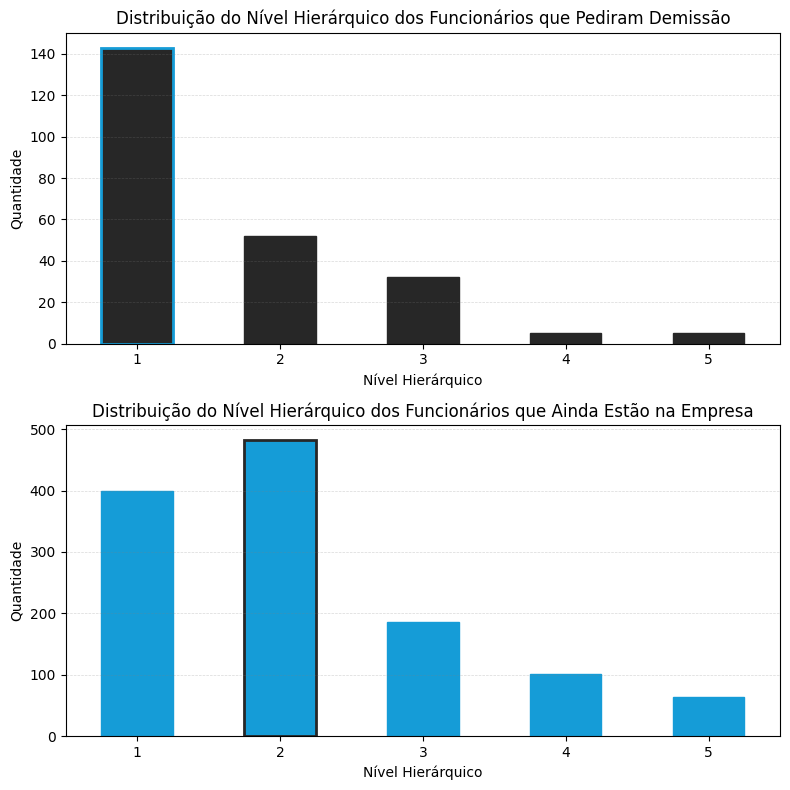

In [ ]:
plt.figure(figsize=(8, 8))

xticks = range(1, 6)

plt.subplot(2, 1, 1)
counts_sim = df[df['Demissão'] == 'Sim']['Nivel Hierarquico'].value_counts().sort_index()

colors_sim = ['#272727' for _ in counts_sim]
edge_colors_sim = ['#159CD7' if value == counts_sim.max() else '#272727' for value in counts_sim]
for i, (bar, edge_color) in enumerate(zip(counts_sim.plot(kind='bar', color=colors_sim, edgecolor=edge_colors_sim).patches, edge_colors_sim)):
    bar.set_edgecolor(edge_color)
    bar.set_linewidth(2 if edge_color == '#159CD7' else 1)

plt.title('Distribuição do Nível Hierárquico dos Funcionários que Pediram Demissão')
plt.xlabel('Nível Hierárquico')
plt.ylabel('Quantidade')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3, axis='y')
plt.xticks(rotation=0)

plt.subplot(2, 1, 2)
counts_nao = df[df['Demissão'] == 'Não']['Nivel Hierarquico'].value_counts().sort_index()

colors_nao = ['#159CD7' for _ in counts_nao]
edge_colors_nao = ['#272727' if value == counts_nao.max() else '#159CD7' for value in counts_nao]
for i, (bar, edge_color) in enumerate(zip(counts_nao.plot(kind='bar', color=colors_nao, edgecolor=edge_colors_nao).patches, edge_colors_nao)):
    bar.set_edgecolor(edge_color)
    bar.set_linewidth(2 if edge_color == '#272727' else 1)

plt.title('Distribuição do Nível Hierárquico dos Funcionários que Ainda Estão na Empresa')
plt.xlabel('Nível Hierárquico')
plt.ylabel('Quantidade')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3, axis='y')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
df['Total de Anos Trabalhados'].unique()

array([ 8, 10,  7,  6, 12,  1, 17,  5,  3, 31, 13,  0, 26, 24, 22,  9, 19,
        2, 23, 14, 15,  4, 29, 28, 21, 25, 20, 11, 16, 37, 38, 30, 40, 18,
       36, 34, 32, 33, 35, 27])

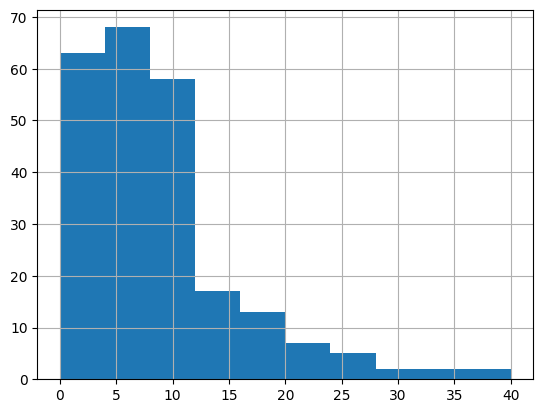

In [ ]:
df[df['Demissão'] == 'Sim']['Total de Anos Trabalhados'].hist()
plt.show()

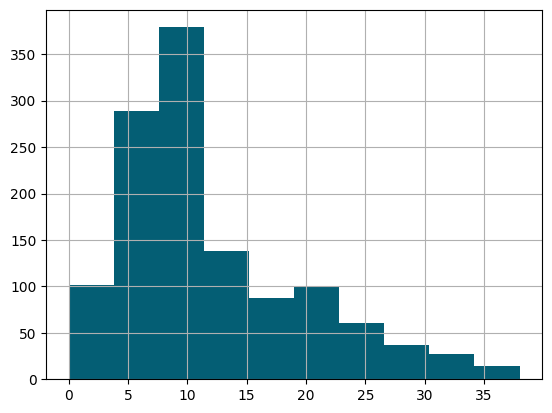

In [ ]:
df[df['Demissão'] == 'Não']['Total de Anos Trabalhados'].hist(color='#045E74')
plt.show()

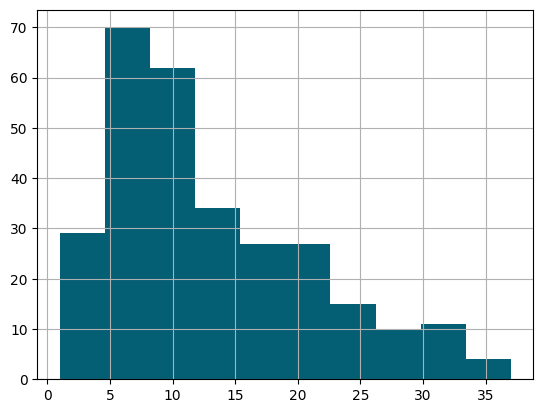

In [ ]:
df[(df['Demissão'] == 'Não') & (df['Faz Hora Extra'] == 'Sim')]['Total de Anos Trabalhados'].hist(color='#045E74')
plt.show()

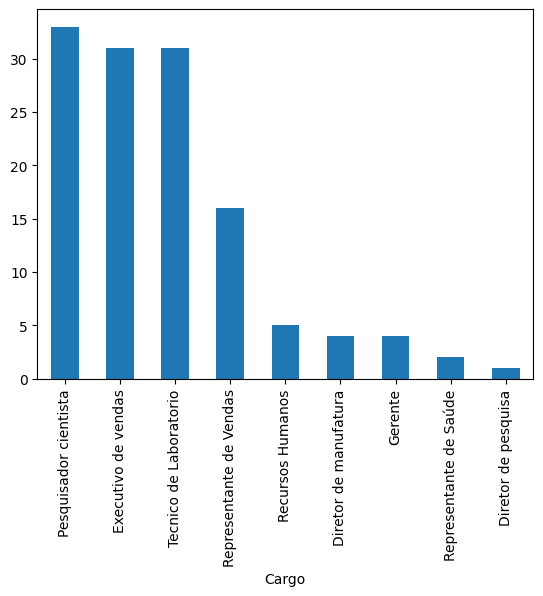

In [ ]:
df[(df['Demissão'] == 'Sim') & (df['Faz Hora Extra'] == 'Sim')]['Cargo'].value_counts().plot(kind='bar')
plt.show()

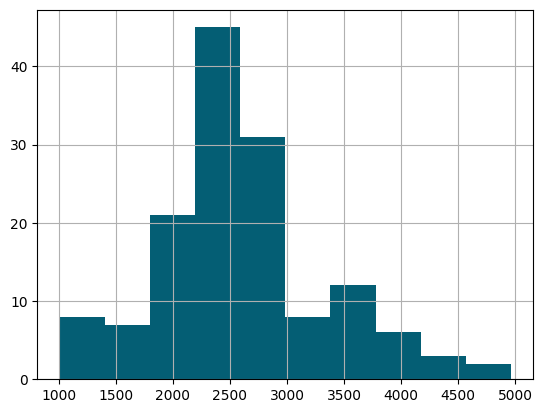

In [ ]:
df[(df['Demissão'] == 'Sim') & (df['Nivel Hierarquico'] == 1)]['Renda Mensal'].hist(color='#045E74')
plt.show()

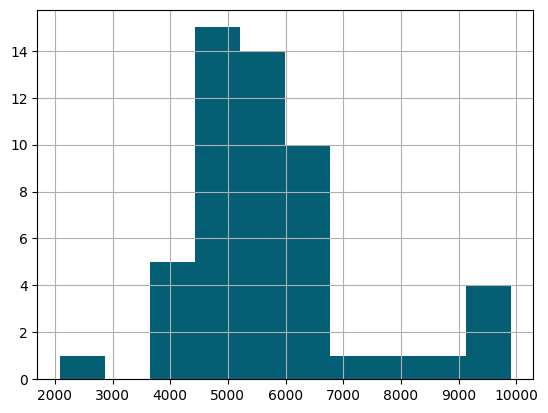

In [ ]:
df[(df['Demissão'] == 'Sim') & (df['Nivel Hierarquico'] == 2)]['Renda Mensal'].hist(color='#045E74')
plt.show()

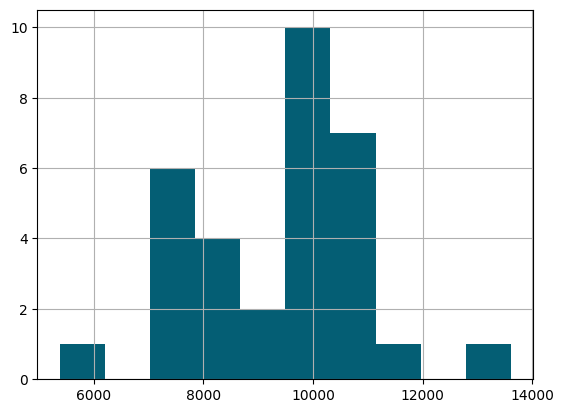

In [ ]:
df[(df['Demissão'] == 'Sim') & (df['Nivel Hierarquico'] == 3)]['Renda Mensal'].hist(color='#045E74')
plt.show()

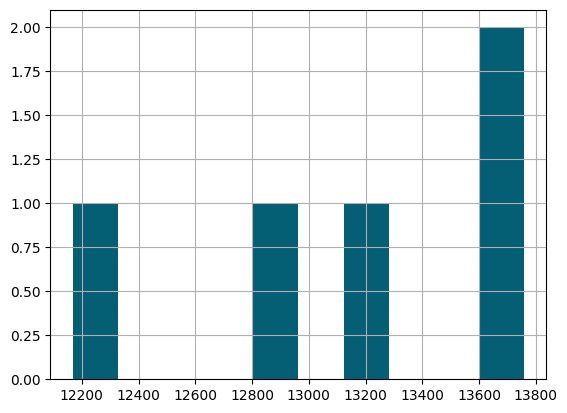

In [ ]:
df[(df['Demissão'] == 'Sim') & (df['Nivel Hierarquico'] == 4)]['Renda Mensal'].hist(color='#045E74')
plt.show()

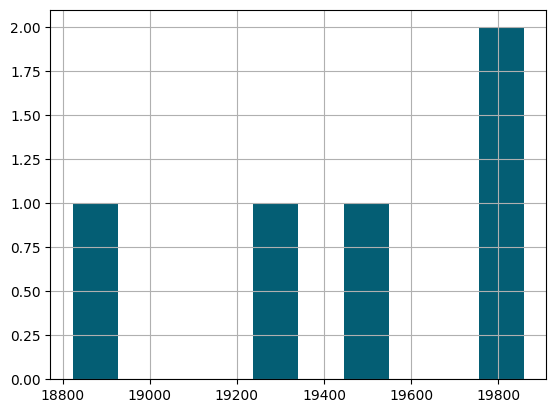

In [ ]:
df[(df['Demissão'] == 'Sim') & (df['Nivel Hierarquico'] == 5)]['Renda Mensal'].hist(color='#045E74')
plt.show()

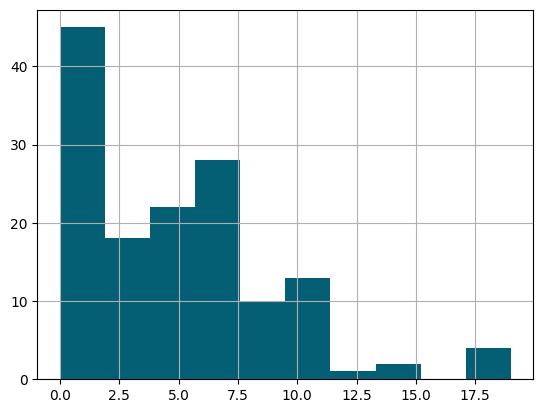

In [ ]:
df[(df['Demissão'] == 'Sim') & (df['Nivel Hierarquico'] == 1)]['Total de Anos Trabalhados'].hist(color='#045E74')
plt.show()

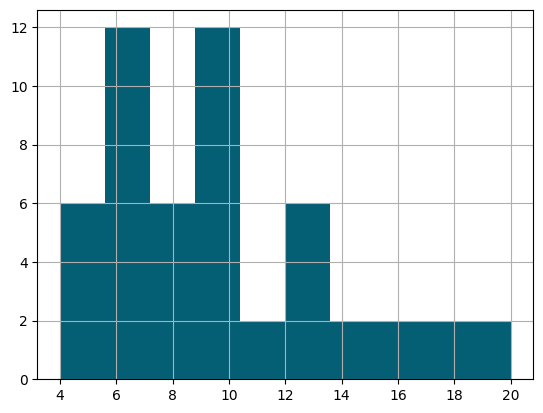

In [ ]:
df[(df['Demissão'] == 'Sim') & (df['Nivel Hierarquico'] == 2)]['Total de Anos Trabalhados'].hist(color='#045E74')
plt.show()

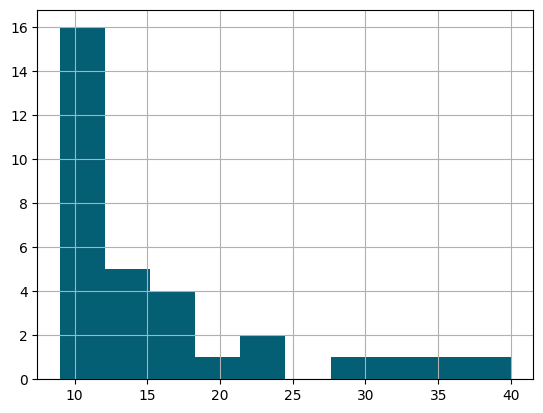

In [ ]:
df[(df['Demissão'] == 'Sim') & (df['Nivel Hierarquico'] == 3)]['Total de Anos Trabalhados'].hist(color='#045E74')
plt.show()

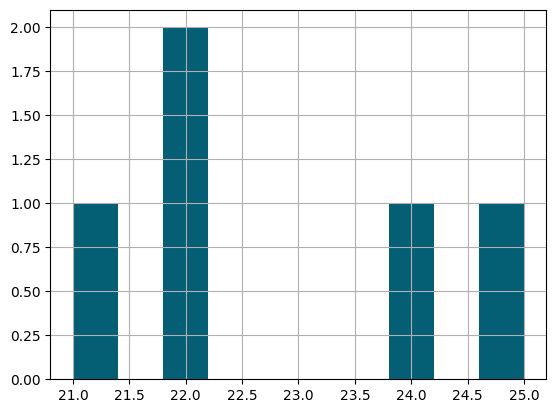

In [ ]:
df[(df['Demissão'] == 'Sim') & (df['Nivel Hierarquico'] == 4)]['Total de Anos Trabalhados'].hist(color='#045E74')
plt.show()

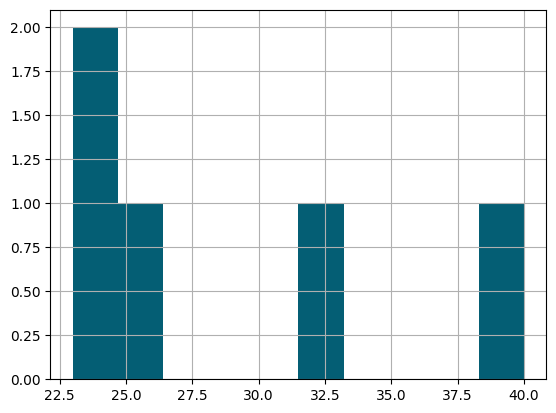

In [ ]:
df[(df['Demissão'] == 'Sim') & (df['Nivel Hierarquico'] == 5)]['Total de Anos Trabalhados'].hist(color='#045E74')
plt.show()

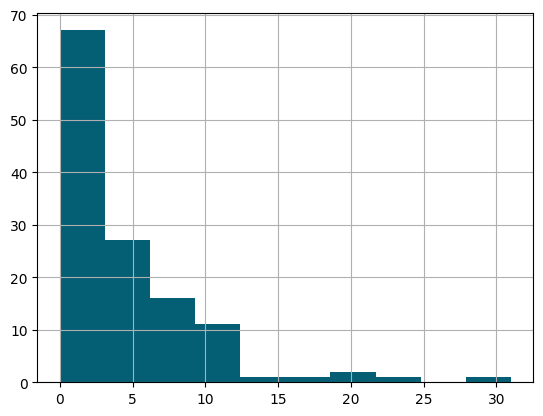

In [ ]:
df[(df['Demissão'] == 'Sim') & (df['Faz Hora Extra'] == 'Sim')]['Total de Anos Trabalhados na Empresa'].hist(color='#045E74')
plt.show()

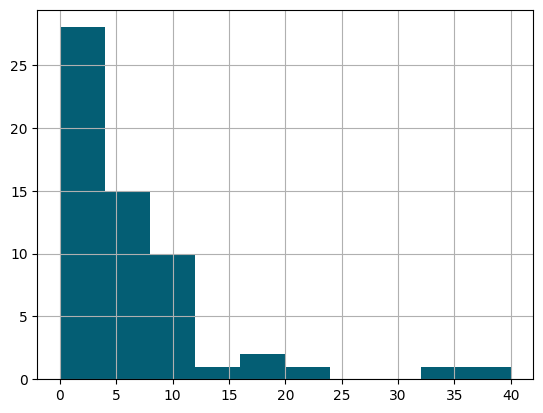

In [ ]:
df[(df['Demissão'] == 'Sim') & (df['Faz Hora Extra'] == 'Não') & (df['Departamento'] == 'Pesquisa e Desenvolvimento')]['Total de Anos Trabalhados na Empresa'].hist(color='#045E74')
plt.show()

1. Apresentar a base (grandes números): contagem de linhas, número de demitidos, não demitidos, colunas
3. Correlações
2. Análise quanti
4. Histogramas (Idade, Renda Mensal, Distância de Casa,	Nivel Hierarquico, Total de Anos Trabalhados, Total de Anos Trabalhados na Empresa, Anos Trabalhados na Funcao Atual, Anos Trabalhando com o Atual Gestor)
5. Análise quali
6. Gráficos
7. Próximos passos

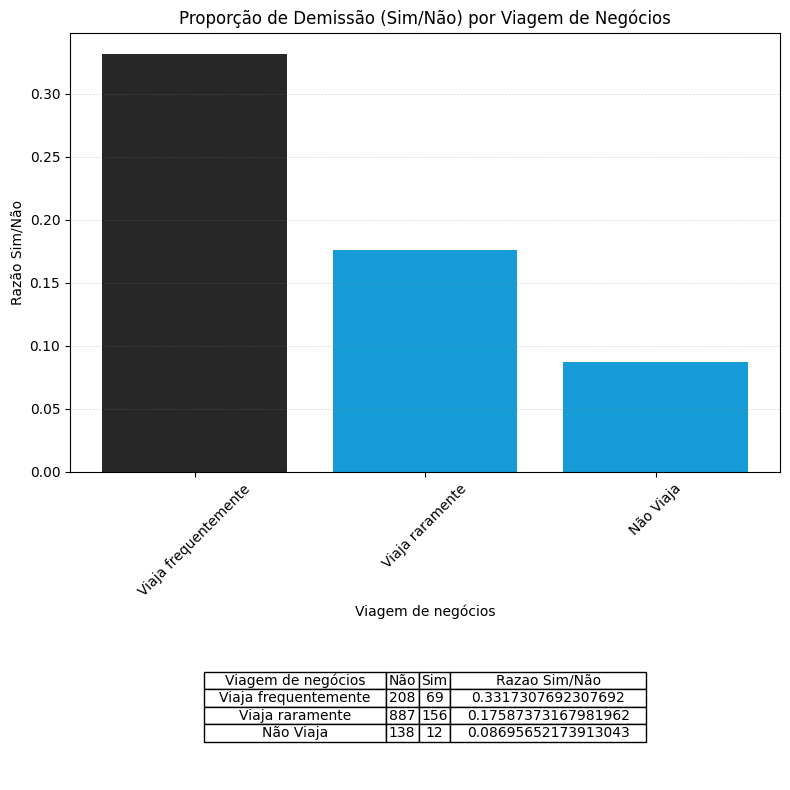

In [ ]:
def criar_tabela_cruzada_demissao_por_variavel(df, coluna):

    crosstab = pd.crosstab(df[coluna], df['Demissão'])

    crosstab['Razao Sim/Não'] = crosstab.apply(
        lambda row: row['Sim'] / row['Não'] if row['Não'] != 0 else None, axis=1
    )

    return crosstab

crosstab_viagem = criar_tabela_cruzada_demissao_por_variavel(df, 'Viagem de negócios')

crosstab_viagem = crosstab_viagem.sort_values(by='Razao Sim/Não', ascending=False)

max_index = crosstab_viagem['Razao Sim/Não'].idxmax()

colors = ['#272727' if idx == max_index else '#159CD7' for idx in crosstab_viagem.index]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios': [3, 1]})

ax1.bar(crosstab_viagem.index, crosstab_viagem['Razao Sim/Não'], color=colors)
ax1.set_xlabel('Viagem de negócios')
ax1.set_ylabel('Razão Sim/Não')
ax1.set_title('Proporção de Demissão (Sim/Não) por Viagem de Negócios')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3, axis='y')

ax2.axis('off')
table = ax2.table(cellText=crosstab_viagem.reset_index().values,
                  colLabels=crosstab_viagem.reset_index().columns,
                  cellLoc='center',
                  loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(crosstab_viagem.columns) + 1)))

plt.tight_layout()
plt.show()

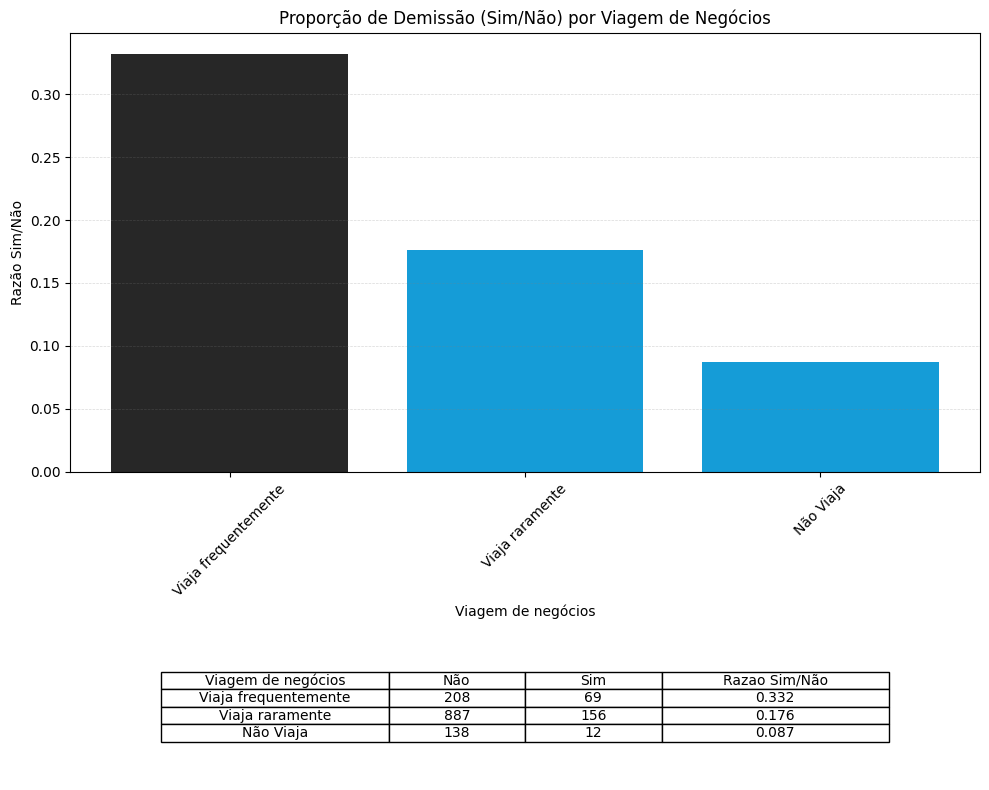

In [ ]:
def criar_tabela_cruzada_demissao_por_variavel(df, coluna):

    crosstab = pd.crosstab(df[coluna], df['Demissão'])

    crosstab['Razao Sim/Não'] = crosstab.apply(
        lambda row: round(row['Sim'] / row['Não'], 3) if row['Não'] != 0 else None, axis=1
    )

    return crosstab

crosstab_viagem = criar_tabela_cruzada_demissao_por_variavel(df, 'Viagem de negócios')

crosstab_viagem = crosstab_viagem.sort_values(by='Razao Sim/Não', ascending=False)

max_index = crosstab_viagem['Razao Sim/Não'].idxmax()

colors = ['#272727' if idx == max_index else '#159CD7' for idx in crosstab_viagem.index]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

ax1.bar(crosstab_viagem.index, crosstab_viagem['Razao Sim/Não'], color=colors)
ax1.set_xlabel('Viagem de negócios')
ax1.set_ylabel('Razão Sim/Não')
ax1.set_title('Proporção de Demissão (Sim/Não) por Viagem de Negócios')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3, axis='y')

ax2.axis('off')
table = ax2.table(cellText=crosstab_viagem.reset_index().values,
                  colLabels=crosstab_viagem.reset_index().columns,
                  cellLoc='center',
                  loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)

for key, cell in table.get_celld().items():
    if key[1] == 1 or key[1] == 2:
        cell.set_width(0.15)
    else:
        cell.set_width(0.25)

plt.tight_layout()
plt.show()

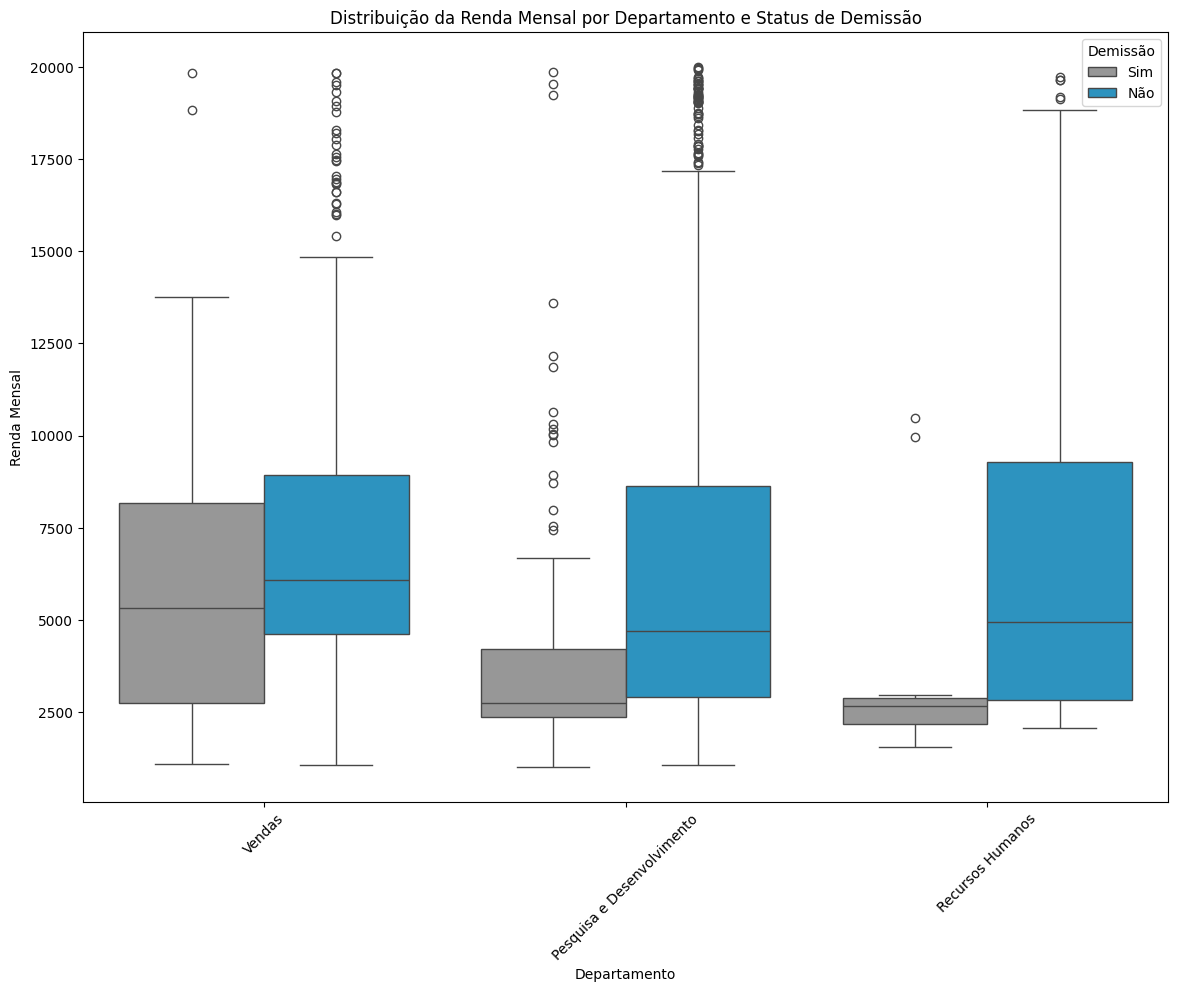

In [ ]:
plt.figure(figsize=(14, 10))

sns.boxplot(data=df, x='Departamento', y='Renda Mensal', hue='Demissão', palette=['#979797', '#159CD7'])

plt.title('Distribuição da Renda Mensal por Departamento e Status de Demissão')
plt.xlabel('Departamento')
plt.ylabel('Renda Mensal')
plt.legend(title='Demissão', loc='upper right')
plt.xticks(rotation=45)

plt.show()

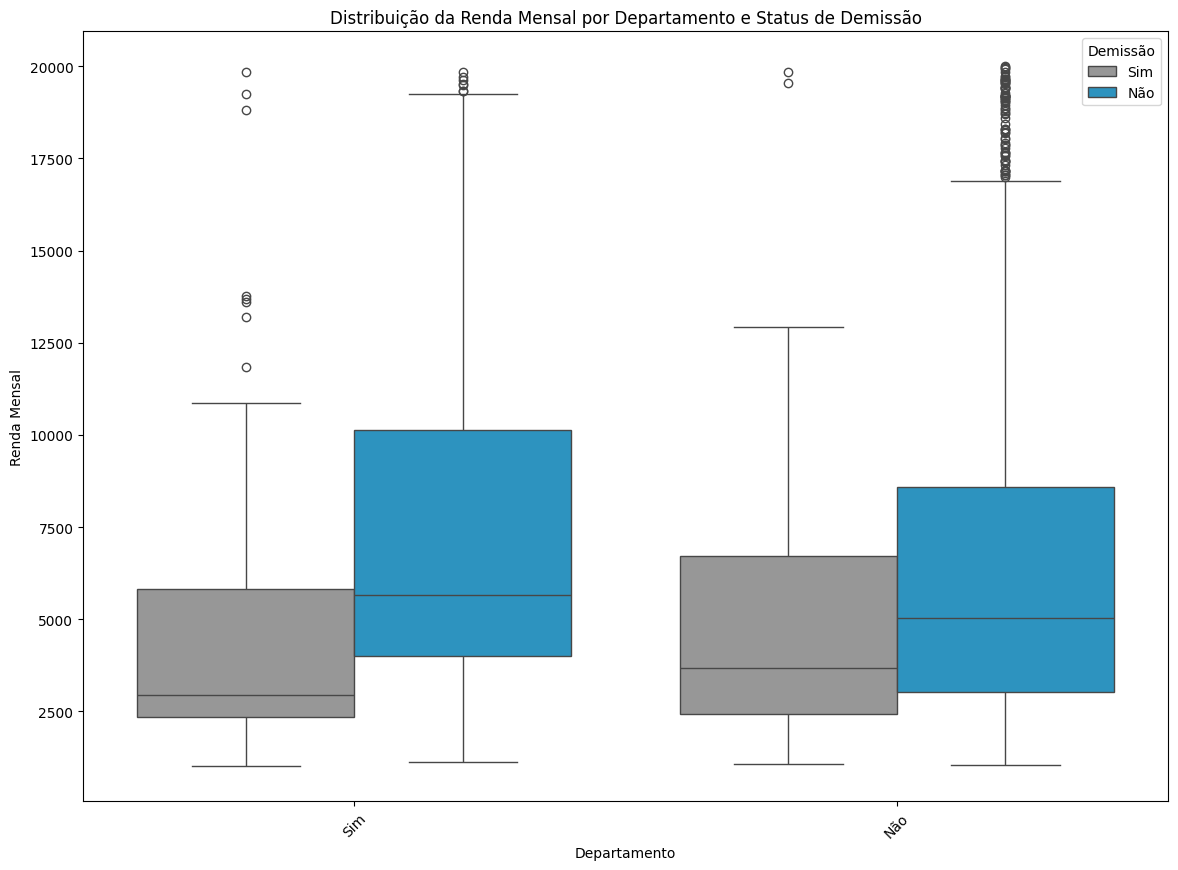

In [ ]:
plt.figure(figsize=(14, 10))

sns.boxplot(data=df, x='Faz Hora Extra', y='Renda Mensal', hue='Demissão', palette=['#979797', '#159CD7'])

plt.title('Distribuição da Renda Mensal por Departamento e Status de Demissão')
plt.xlabel('Departamento')
plt.ylabel('Renda Mensal')
plt.legend(title='Demissão', loc='upper right')
plt.xticks(rotation=45)

plt.show()